In [11]:
# 1-cell: Kutubxonalarni yuklaymiz:
from ultralytics import YOLO
import torch

print("Ultralytics YOLO yuklandi!")
print("PyTorch versiyasi:", torch.__version__)


Ultralytics YOLO yuklandi!
PyTorch versiyasi: 2.5.1+cu121


In [2]:
# Modelni yuklash
model = YOLO("C:/Users/bahti/computer_vision/LOYIHA/loyiha-1/runs/detect/helmet_train/weights/best.pt")
print("Model yuklandi.")

Model yuklandi.


In [3]:
# Validation — mAP, Precision, Recall, Confusion Matrix
metrics = model.val(
    data="dataset.yaml",   # agar fayl nomi boshqacha bo'lsa shu yerda almashtiring
    imgsz=640
)

metrics

Ultralytics 8.3.235  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 3220.1894.2 MB/s, size: 237.7 KB)
val: Scanning C:\Users\bahti\computer_vision\LOYIHA\loyiha-1\dataset\labels\val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1000/1000  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 63/63 9.4it/s 6.7s<0.2s
                   all       1000       4935      0.928      0.886      0.941       0.63
                helmet        902       3659      0.959      0.898      0.965       0.65
                  head        192       1276      0.897      0.874      0.916       0.61
Speed: 0.9ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to C:\Users\bahti\computer_vision\LOYIHA\loyiha-1\runs\detect\val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020652266990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

📊 Visualizing Confusion Matrix and Box-level Curves...



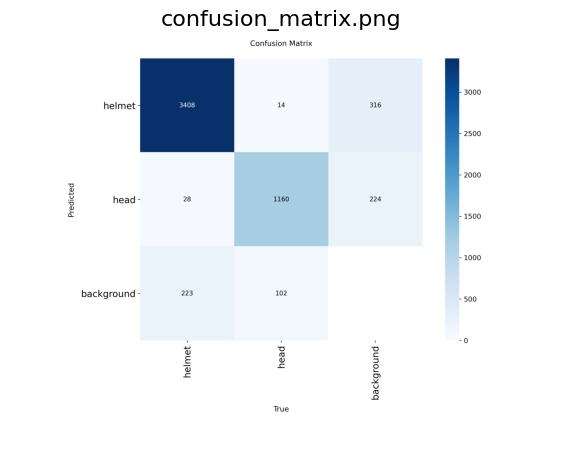

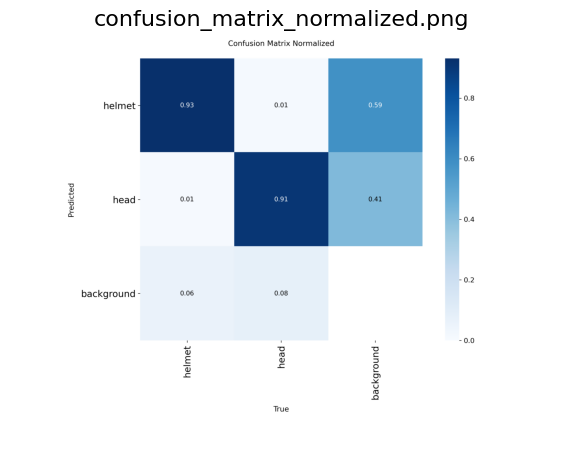

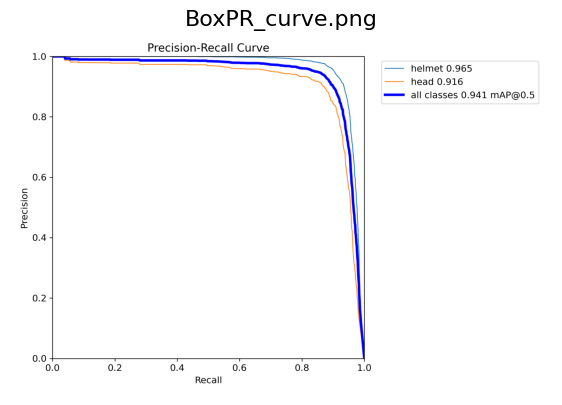

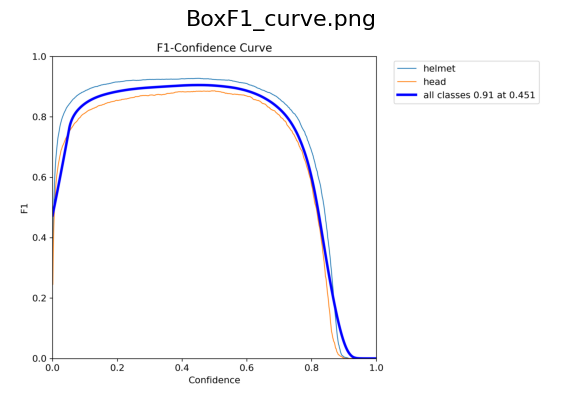

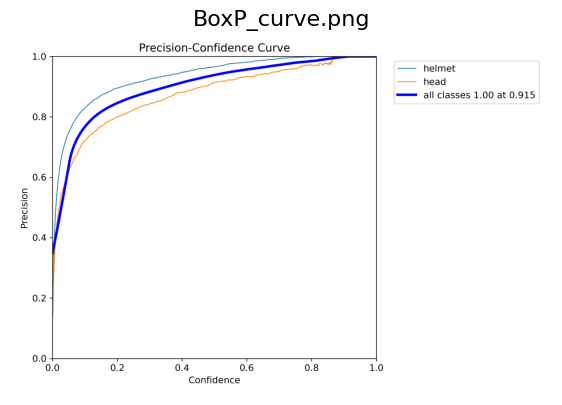

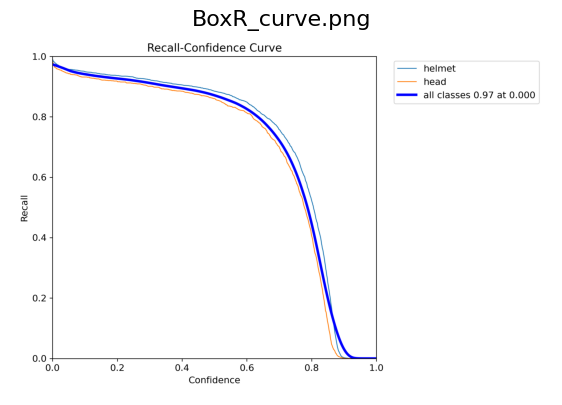


🖼 Visualizing Batch-level Label & Prediction Images...



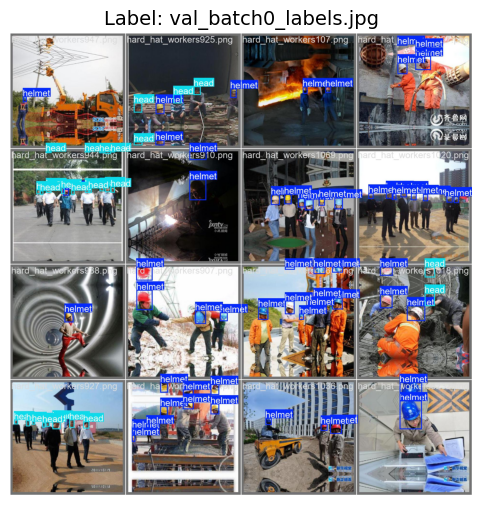

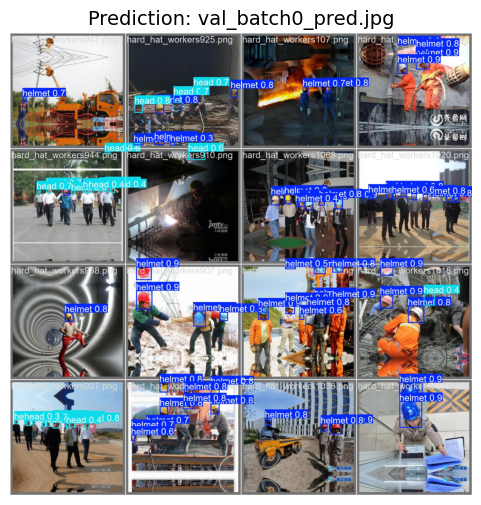

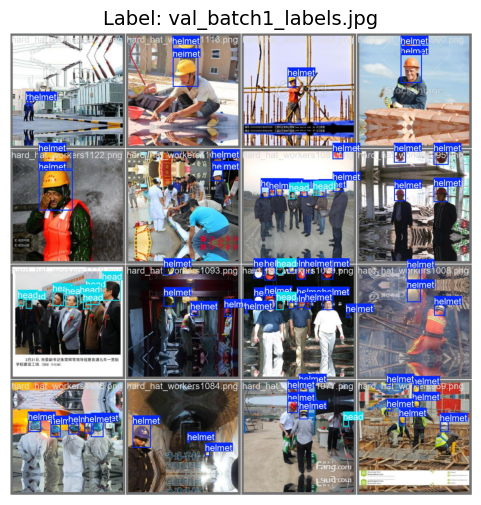

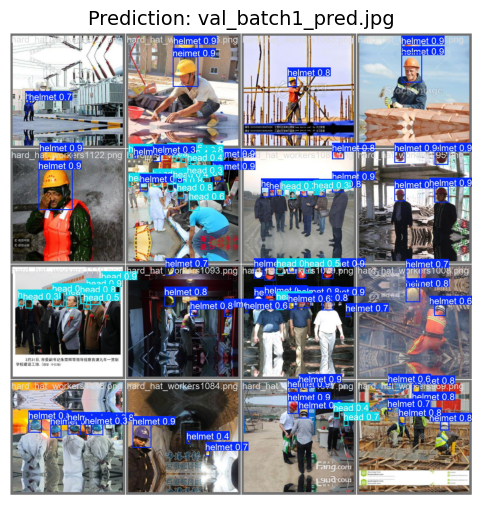

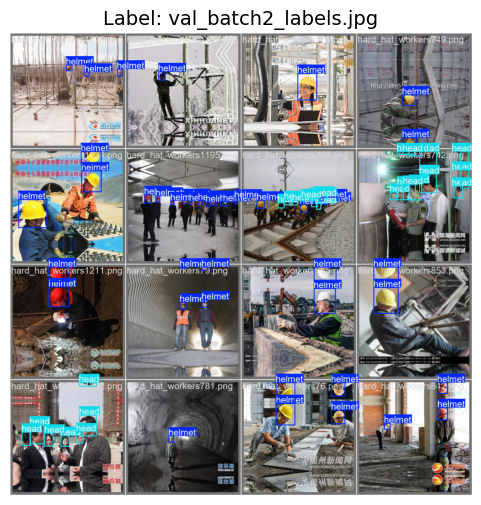

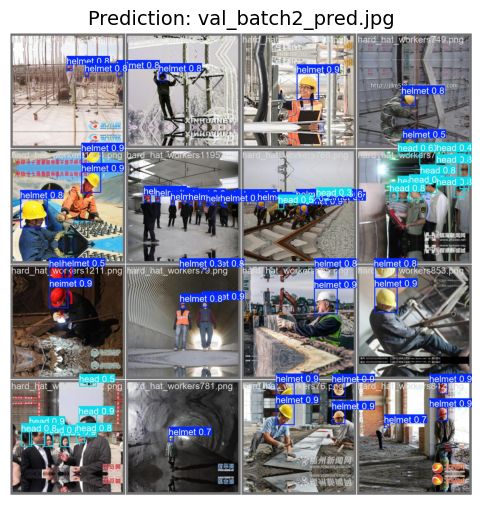

In [4]:
# ✅ 4-CELL: Unified Visualization for YOLOv8 Validation Results

%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

# Val natijalari saqlangan papka
save_dir = Path("runs/detect/val")

# 1️⃣ Grafiklar va confusion matrix
plots = [
    "confusion_matrix.png",
    "confusion_matrix_normalized.png",
    "BoxPR_curve.png",
    "BoxF1_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png"
]

print("📊 Visualizing Confusion Matrix and Box-level Curves...\n")
for f in plots:
    path = save_dir / f
    if path.exists():
        img = Image.open(path).convert("RGB")  # RGBA/PNG muammosini oldini oladi
        plt.figure(figsize=(7,7))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f, fontsize=16)
        plt.show()
    else:
        print(f"⚠️ Topilmadi: {path}")

# 2️⃣ Batch-level label va prediction rasmlar
print("\n🖼 Visualizing Batch-level Label & Prediction Images...\n")
batch_labels = sorted(save_dir.glob("val_batch*_labels.jpg"))

for lbl_path in batch_labels:
    pred_path = save_dir / lbl_path.name.replace("_labels.jpg","_pred.jpg")
    
    for p, t in zip([lbl_path, pred_path], ["Label", "Prediction"]):
        if p.exists():
            img = Image.open(p).convert("RGB")
            plt.figure(figsize=(6,6))
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{t}: {p.name}", fontsize=14)
            plt.show()


In [5]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [6]:
from ultralytics import YOLO
import pandas as pd

# 1️⃣ MODELNI YUKLAYMIZ
model_path = "C:/Users/bahti/computer_vision/LOYIHA/loyiha-1/runs/detect/helmet_train/weights/best.pt"
model = YOLO(model_path)

# 2️⃣ VAL QILAMIZ (results.yaml endi YO'Q)
val_results = model.val(
    data="dataset.yaml",
    project="runs/detect",
    name="val",
    exist_ok=True,
    save_json=True,
    plots=True
)

# 3️⃣ METRIKALARNI O'QIYMIZ
metrics = {
    "precision": val_results.box.mp,
    "recall": val_results.box.mr,
    "mAP50": val_results.box.map50,
    "mAP50-95": val_results.box.map,
}

df = pd.DataFrame([metrics])
print("\n📊 Yangi YOLOv8.3 METRIKALARI:")
display(df)


Ultralytics 8.3.235  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2747.8443.4 MB/s, size: 259.5 KB)
val: Scanning C:\Users\bahti\computer_vision\LOYIHA\loyiha-1\dataset\labels\val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1000/1000  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 63/63 9.1it/s 6.9s0.2ss
                   all       1000       4935      0.928      0.886      0.941       0.63
                helmet        902       3659      0.959      0.898      0.965       0.65
                  head        192       1276      0.897      0.874      0.916       0.61
Speed: 0.9ms preprocess, 2.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Saving C:\Users\bahti\computer_vision\LOYIHA\loyiha-1\runs\detect\val\predictions.json...

,precision,recall,mAP50,mAP50-95
0,0.927958,0.885768,0.940604,0.62992


In [8]:
import os
from ultralytics import YOLO
import cv2
import time
from tqdm import tqdm

# ===============================
# 1️⃣ MODELNI YUKLASH
# ===============================
model_path = "runs/detect/helmet_train/weights/best.pt"
assert os.path.exists(model_path), "Model topilmadi!"
model = YOLO(model_path)

# ===============================
# 2️⃣ TEST VIDEO
# ===============================
video_path = "test_uchun/video1.mp4"
assert os.path.exists(video_path), "Video topilmadi!"
cap = cv2.VideoCapture(video_path)

# ===============================
# 3️⃣ OUTPUT PAPKA VA VIDEO
# ===============================
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "helmet_output.avi")

fourcc = cv2.VideoWriter_fourcc(*'XVID')  # AVI format
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps_video = cap.get(cv2.CAP_PROP_FPS) or 30.0
out = cv2.VideoWriter(output_path, fourcc, fps_video, (width, height))

# ===============================
# 4️⃣ FRAME-BY-FRAME INFERENCE
# ===============================
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps_list = []

for _ in tqdm(range(frame_count), desc="Processing frames"):
    ret, frame = cap.read()
    if not ret:
        break

    start = time.time()
    results = model(frame, verbose=False)  # verbose=False loglarni o'chiradi
    end = time.time()

    # ZeroDivisionError oldini olish
    dt = end - start
    fps = 1 / dt if dt > 0 else 0
    fps_list.append(fps)

    annotated = results[0].plot()
    out.write(annotated)

# ===============================
# 5️⃣ RESURSLARNI BO'SHATISH
# ===============================
cap.release()
out.release()

print("\n✅ Video saqlandi:", output_path)
print("O'rtacha FPS:", sum(fps_list)/len(fps_list))


Processing frames: 100%|███████████████████████████████████████████████████████████| 7353/7353 [01:16<00:00, 95.95it/s]


✅ Video saqlandi: output\helmet_output.avi
O'rtacha FPS: 120.64587676612956


In [ ]:
from ultralytics import YOLO
import os

# YOLOv8 PT model
pt_model_path = "runs/detect/helmet_train/weights/best.pt"
onnx_model_path = "runs/detect/helmet_train/weights/best.onnx"

# Modelni yuklash
model = YOLO(pt_model_path)

# ONNX formatida eksport
model.export(format="onnx", opset=12)
print(f"✅ ONNX fayl saqlandi: {onnx_model_path}")


Ultralytics 8.3.235  Python-3.11.0 torch-2.5.1+cu121 CPU (13th Gen Intel Core i5-13500HX)
 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\helmet_train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.5 MB 8.3 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/16.5 MB 6.2 MB/s eta 0:00:03
   -------- ------------------------------- 3.7/16.5 MB 6.8 MB/s eta 0:00:02
   ------------- -----

In [10]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.0 MB 8.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/9.0 MB 9.1 MB/s eta 0:00:01
   ----------------------- ---------------- 5.2/9.0 MB 8.4 MB/s eta 0:00:01
   -------------------------------- ------- 7.3/9.0 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 9.0/9.0 MB 8.8 MB/s  0:00:01
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   ---------------------------------------- 795.4/795.4 kB 3.4 MB/s  0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/6.9 MB 9.1 MB/s eta 0:00:01
   --------------------- ------------------ 3.7/6.9 MB 9.1 MB/s eta 0:00:01
   --------------------------------- ------ 5.8/6.9 MB 9.3 MB/s eta 0:00:01
   ----------------------------

In [14]:
pip install onnx onnxruntime-gpu onnxslim --upgrade


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.5 MB 1.9 MB/s eta 0:00:09
   -- ------------------------------------- 1.0/16.5 MB 1.9 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/16.5 MB 1.8 MB/s eta 0:00:09
   --- ------------------------------------ 1.6/16.5 MB 1.9 MB/s eta 0:00:08
   --- ------------------------------------ 1.6/16.5 MB 1.9 MB/s eta 0:00:08
   ----- ---------------------------------- 2.4/16.5 MB 1.6 MB/s eta 0:00:09
   -------- ------------------------------- 3.4/16.5 MB 2.1 MB/s eta 0:00:07
   ----------- ---------------------------- 4.7/16.5 MB 2.6 MB/s eta 0:00:05
   --------------- ------------------------ 6.6/16.5 MB 3.3 MB/s eta 0:00:04
   ------------------- -------------------- 8.1/16.5 MB 3.7 MB/s eta 0:00:03
   ---------

  You can safely remove it manually.


In [17]:
pip install onnx==1.19.1 --force-reinstall


Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   --- ------------------------------------ 1.3/16.5 MB 7.4 MB/s eta 0:00:03
   -------- ------------------------------- 3.4/16.5 MB 8.4 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/16.5 MB 7.9 MB/s eta 0:00:02
   --------------- ------------------------ 6.6/16.5 MB 8.2 MB/s eta 0:00:02
   -------------------- ------------------- 8.4/16.5 MB 8.1 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.5 MB 8.3 MB/s eta 0:00:01
   ----------------------------- ---------- 12.3/16.5 MB 8.3 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.5 MB 8.3 MB/s eta 0:00:01
   -------------------------------------- - 16.0/16.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 16.5/16.5 MB 8.3 MB/s  0:00:01
   

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.


In [18]:
from ultralytics import YOLO

model = YOLO("runs/detect/helmet_train/weights/best.pt")
model.export(format="onnx", opset=12)


Ultralytics 8.3.235  Python-3.11.0 torch-2.5.1+cu121 CPU (13th Gen Intel Core i5-13500HX)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\helmet_train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

ONNX: starting export with onnx 1.19.1 opset 12...
ONNX: slimming with onnxslim 0.1.78...
ONNX: export success  0.6s, saved as 'runs\detect\helmet_train\weights\best.onnx' (11.7 MB)

Export complete (0.9s)
Results saved to C:\Users\bahti\computer_vision\LOYIHA\loyiha-1\runs\detect\helmet_train\weights
Predict:         yolo predict task=detect model=runs\detect\helmet_train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\helmet_train\weights\best.onnx imgsz=640 data=dataset.yaml  
Visualize:       https://netron.app


'runs\\detect\\helmet_train\\weights\\best.onnx'

In [19]:
# streamlit_app.py
import streamlit as st
from ultralytics import YOLO
import cv2
import tempfile
import os

st.set_page_config(page_title="Helmet & Head Detection Demo", layout="wide")
st.title("🪖 Helmet & Head Detection Demo")

# 1️⃣ ONNX modelni yuklash
model_path = "runs/detect/helmet_train/weights/best.onnx"  # sizning ONNX manzilingiz
model = YOLO(model_path)

# 2️⃣ Foydalanuvchi video yuklashi
uploaded_file = st.file_uploader("Video yuklang (mp4 yoki avi)", type=["mp4", "avi"])

if uploaded_file is not None:
    # Faylni vaqtinchalik saqlash
    tfile = tempfile.NamedTemporaryFile(delete=False)
    tfile.write(uploaded_file.read())
    video_path = tfile.name

    # Video oqimini o‘qish
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Natija videoni saqlash uchun
    output_path = "output_annotated.avi"
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    stframe = st.empty()
    st.text("Video annotatsiya qilinmoqda...")

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for i in range(frame_count):
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)  # ONNX model bilan inference
        annotated_frame = results[0].plot()  # Annotatsiya

        out.write(annotated_frame)
        # Streamlit-da natijani ko‘rsatish (RGB format)
        stframe.image(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB), channels="RGB")

    cap.release()
    out.release()
    st.success("✅ Video tayyor! 'output_annotated.avi' faylini quyida yuklab oling.")

    # Yuklash tugmasi
    with open(output_path, "rb") as f:
        st.download_button("📥 Annotated videoni yuklab olish", f, file_name="annotated_video.avi")


2025-12-09 19:14:08.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 19:14:08.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar